In [198]:
import requests
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain

# Сбор данных с сайта hh.ru

In [9]:
USER_AGENT = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) ' \
             'Chrome/104.0.5112.124 YaBrowser/22.9.4.863 Yowser/2.5 Safari/537.36'

JOB_TITLE = 'python backend разработчик'
URL = 'https://api.hh.ru/vacancies'

> ### Собираем id вакансий Python Backend dev

In [10]:
def number_of_pages(url: str, job_title: str, per_page=100) -> int:
    '''
    Получаем количество страниц с вакансиями
    '''
    param = {'text': job_title, 'per_page': per_page}
    req = requests.get(url, params=param)
    return req.json()['pages']

In [11]:
def get_job_id(url: str, job_title: str, per_page=100) -> list:
    '''
    Функция возвращает список id вакансий с названием job_title
    '''
    job_id = []
    pages = number_of_pages(url, job_title, per_page)
    for page in tqdm(range(pages)):
        param = {'text': job_title, 'per_page': per_page, 'page': page}
        req = requests.get(url, params=param)
        vacancies = req.json()
        for vac in vacancies.get('items'):
            job_id.append(vac.get('id'))
    return job_id

In [12]:
python_dev_job_id = get_job_id(URL, JOB_TITLE)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:05<00:00,  1.63it/s]


In [13]:
print('Количество найденных вакансий:', len(python_dev_job_id))

Количество найденных вакансий: 894


> ### Собираем подробные описания вакансий в список по найденным id.

In [15]:
list_vacs = []
for id in tqdm(python_dev_job_id):
    url_2 = f'https://api.hh.ru/vacancies/{id}'
    r_2 = requests.get(url_2)
    one_vac = r_2.json()
    list_vacs.append(one_vac)

100%|████████████████████████████████████████████████████████████████████████████████| 894/894 [02:41<00:00,  5.54it/s]


In [16]:
df = pd.DataFrame(list_vacs)
df.head()

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,...,suitable_resumes_url,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,languages
0,72216524,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Python Backend Developer / WEB - разработчик,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 220000, 'to': 280000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/72216524,[],[],[],False,[]
1,72232112,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Senior Backend developer (Golang) удаленно,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 400000, 'to': 600000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/72232112,[],[],[],False,"[{'id': 'eng', 'name': 'Английский', 'level': ..."
2,72313102,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Intern / Junior Python backend developer,None,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': None, 'to': 60000, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/72313102,[],[],"[{'id': 'start_after_sixteen', 'name': 'Можно ...",False,[]
3,71905950,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Junior/Middle Python Developer (Backend) - раз...,None,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'from': 60000, 'to': 100000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/71905950,[],[],[],False,[]
4,72034802,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Backend-разработчик jun+/mid- (Golang),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': 400000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/72034802,[],[],[],True,[]


> ### Оставляем нужные столбцы

In [17]:
df.columns

Index(['id', 'premium', 'billing_type', 'relations', 'name',
       'insider_interview', 'response_letter_required', 'area', 'salary',
       'type', 'address', 'allow_messages', 'experience', 'schedule',
       'employment', 'department', 'contacts', 'description',
       'branded_description', 'vacancy_constructor_template', 'key_skills',
       'accept_handicapped', 'accept_kids', 'archived', 'response_url',
       'specializations', 'professional_roles', 'code', 'hidden',
       'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'employer', 'published_at', 'created_at',
       'initial_created_at', 'negotiations_url', 'suitable_resumes_url',
       'apply_alternate_url', 'has_test', 'test', 'alternate_url',
       'working_days', 'working_time_intervals', 'working_time_modes',
       'accept_temporary', 'languages'],
      dtype='object')

In [18]:
col_filter = ['id', 'name', 'area', 'salary', 'experience', 'schedule', 'employment', 'key_skills', 'employer', 'languages']

In [19]:
df_vacancies = df.copy()

In [20]:
df_vacancies = df_vacancies[col_filter]

> ### Получаем значения из словарей

In [21]:
df_vacancies['area'] = df_vacancies.area.apply(lambda x: x.get('name'))
df_vacancies['experience'] = df_vacancies.experience.apply(lambda x: x.get('name'))
df_vacancies['schedule'] = df_vacancies.schedule.apply(lambda x: x.get('name'))
df_vacancies['employment'] = df_vacancies.employment.apply(lambda x: x.get('name'))
df_vacancies['key_skills'] = df_vacancies.key_skills.apply(lambda x: [i.get('name') for i in x])

In [22]:
df_vacancies['salary_from'] = df_vacancies.salary.apply(lambda x: x.get('from') if x is not None else None)
df_vacancies['salary_to'] = df_vacancies.salary.apply(lambda x: x.get('to') if x is not None else None)
df_vacancies['salary_currency'] = df_vacancies.salary.apply(lambda x: x.get('currency') if x is not None else None)

df_vacancies.drop(['salary'], axis=1, inplace=True)

In [23]:
df_vacancies['employer_id'] = df_vacancies.employer.apply(lambda x: x.get('id'))
df_vacancies['employer_name'] = df_vacancies.employer.apply(lambda x: x.get('name'))

df_vacancies.drop(['employer'], axis=1, inplace=True)

In [24]:
def get_lang(lang: list) -> list:
    return [[i.get('name'), i.get('level').get('name')] for i in lang]

df_vacancies['languages'] = df_vacancies.languages.apply(get_lang)
df_vacancies['languages'] = df_vacancies.languages.apply(lambda x: np.nan if not x else x)

In [25]:
df_vacancies.head()

,id,name,area,experience,schedule,employment,key_skills,languages,salary_from,salary_to,salary_currency,employer_id,employer_name
0,72216524,Python Backend Developer / WEB - разработчик,Москва,От 3 до 6 лет,Удаленная работа,Полная занятость,"[Python, Linux, Bash, SQL, Git, ООП, FastAPI, ...",NaN,220000.0,280000.0,RUR,1713030,Перфект Системс
1,72232112,Senior Backend developer (Golang) удаленно,Москва,От 3 до 6 лет,Гибкий график,Полная занятость,"[Английский язык, Rust, Лидерство, golang, go]","[[Английский, B2 — Средне-продвинутый]]",400000.0,600000.0,RUR,578702,ArtVolkov.ru
2,72313102,Intern / Junior Python backend developer,Санкт-Петербург,Нет опыта,Гибкий график,Частичная занятость,"[Python, Celery, Docker, JavaScript, RabbitMQ,...",NaN,NaN,60000.0,RUR,4888751,Рекруто
3,71905950,Junior/Middle Python Developer (Backend) - раз...,Новосибирск,От 1 года до 3 лет,Полный день,Полная занятость,"[Python, Linux, Django Framework, Bash, Docker...",NaN,60000.0,100000.0,RUR,4602050,Апэрбот
4,72034802,Backend-разработчик jun+/mid- (Golang),Москва,От 1 года до 3 лет,Полный день,Полная занятость,"[Golang, Linux, PostgreSQL, Docker, Python]",NaN,100000.0,400000.0,RUR,9244855,Центр Развития Технологий


In [26]:
df_vacancies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               894 non-null    object 
 1   name             894 non-null    object 
 2   area             894 non-null    object 
 3   experience       894 non-null    object 
 4   schedule         894 non-null    object 
 5   employment       894 non-null    object 
 6   key_skills       894 non-null    object 
 7   languages        150 non-null    object 
 8   salary_from      258 non-null    float64
 9   salary_to        201 non-null    float64
 10  salary_currency  298 non-null    object 
 11  employer_id      894 non-null    object 
 12  employer_name    894 non-null    object 
dtypes: float64(2), object(11)
memory usage: 90.9+ KB


In [27]:
sns.set(rc={'figure.figsize':(15, 12)})
sns.set_style("whitegrid")

> #### Количество вакансий по городам

In [28]:
top_ten_area_list = list(df_vacancies.groupby(['area']).size().sort_values(ascending=False).index[:10])
top_ten_area_list

['Москва',
 'Санкт-Петербург',
 'Алматы',
 'Новосибирск',
 'Екатеринбург',
 'Тбилиси',
 'Казань',
 'Минск',
 'Астана',
 'Нижний Новгород']

In [29]:
df_areas = df_vacancies['area'].copy()
df_areas = pd.DataFrame(df_areas)

In [30]:
df_areas.loc[df_areas.area.isin(top_ten_area_list)]

,area
0,Москва
1,Москва
2,Санкт-Петербург
3,Новосибирск
4,Москва
...,...
888,Москва
889,Москва
891,Москва
892,Екатеринбург


In [31]:
df_areas['area'] = pd.Categorical(df_areas['area'], top_ten_area_list)

<AxesSubplot:xlabel='area', ylabel='Count'>

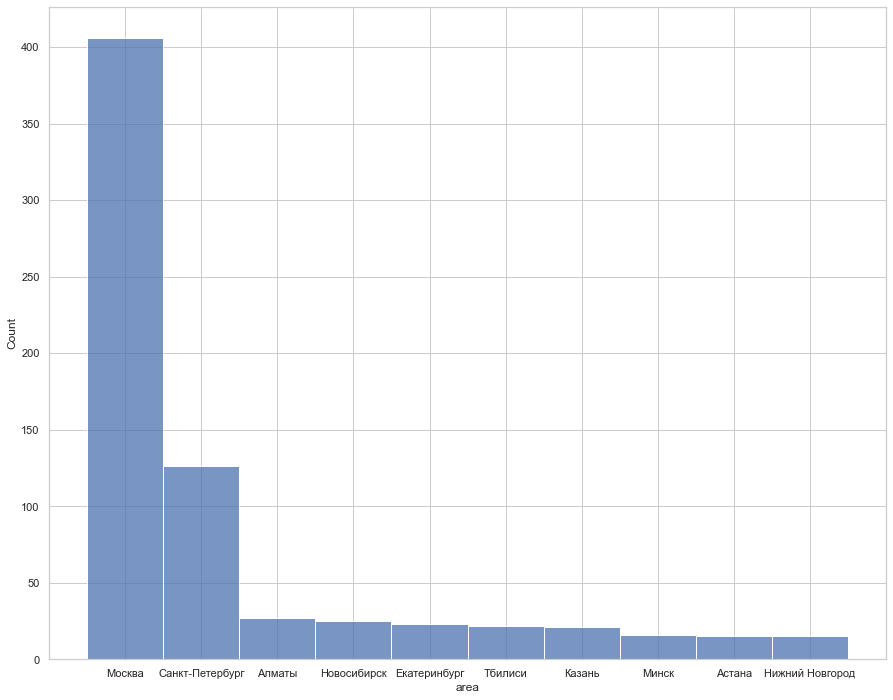

In [32]:
sns.histplot(data=df_areas.loc[df_areas.area.isin(top_ten_area_list)],
            x='area')

> #### Количество вакансий по компаниям

In [33]:
df_employers = df_vacancies['employer_name'].copy()
df_employers = pd.DataFrame(df_employers)

In [34]:
top_ten_employer_list = list(df_vacancies.groupby(['employer_name']).size().sort_values(ascending=False).index[:10])
top_ten_employer_list

['СБЕР',
 'Яндекс',
 'Контур',
 'МТС',
 '2ГИС',
 'Ozon',
 'АйСи Сервис',
 'Cloud',
 'Онлайн-школа Тетрика',
 'Nitka Technologies']

In [35]:
df_employers['employer_name'] = pd.Categorical(df_employers['employer_name'], top_ten_employer_list)

<AxesSubplot:xlabel='employer_name', ylabel='Count'>

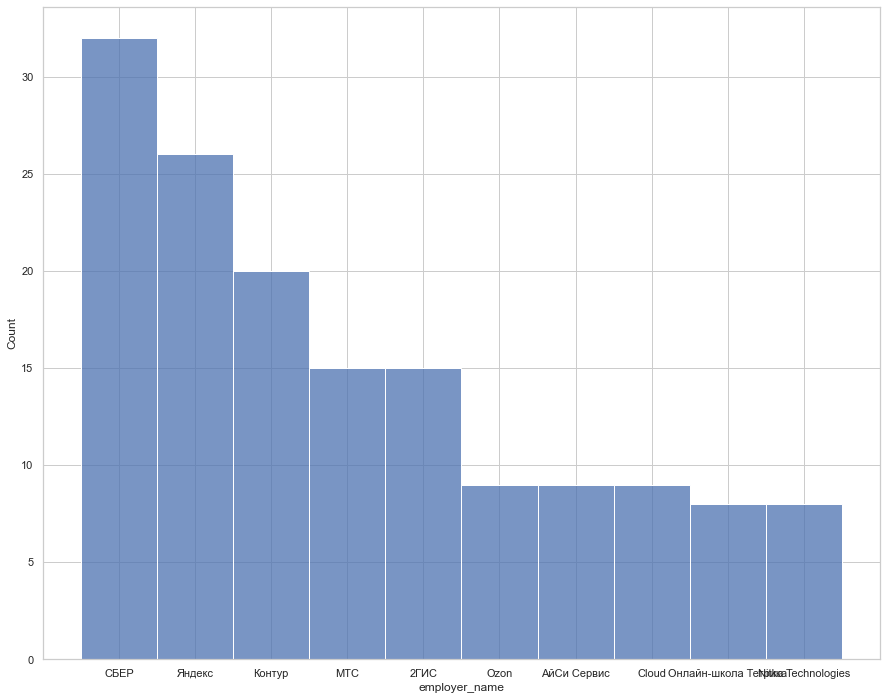

In [36]:
sns.set_style("whitegrid")
sns.histplot(data=df_employers.loc[df_employers.employer_name.isin(top_ten_employer_list)],
             x='employer_name')

>#### Формат работы

In [119]:
df_schedule = pd.DataFrame(df_vacancies.schedule.copy())
df_schedule.head()

,schedule
0,Удаленная работа
1,Гибкий график
2,Гибкий график
3,Полный день
4,Полный день


<AxesSubplot:xlabel='schedule', ylabel='Count'>

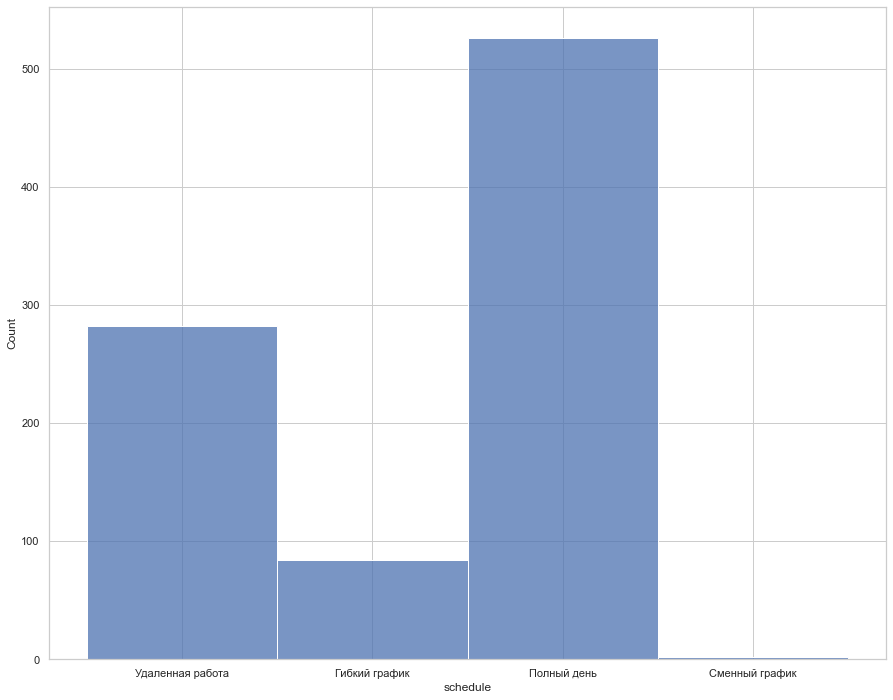

In [122]:
sns.histplot(data=df_schedule, x='schedule')

>#### Зарплаты

In [70]:
df_vacancies['salary'] = float()

In [104]:
df_vacancies.loc[~df_vacancies['salary_from'].isnull() & 
                 ~df_vacancies['salary_to'].isnull(), 'salary'] = (df_vacancies['salary_from'] +
                                                                   df_vacancies['salary_to']) / 2
df_vacancies.loc[df_vacancies['salary_from'].isnull() & 
                 ~df_vacancies['salary_to'].isnull(), 'salary'] = df_vacancies['salary_to']
df_vacancies.loc[~df_vacancies['salary_from'].isnull() & 
                 df_vacancies['salary_to'].isnull(), 'salary'] = df_vacancies['salary_from']

In [144]:
currency = dict(USD=60.4,
            EUR=62.16, 
            KZT= 0.1307, 
            UZS= 0.00539, 
            BYR= 24.96, 
            KGS= 0.716, 
            GEL= 22.3, 
            RUR= 1)

df_vacancies['new_salary'] = df_vacancies['salary_currency'].map(currency) * df_vacancies['salary']

<AxesSubplot:xlabel='new_salary', ylabel='employer_name'>

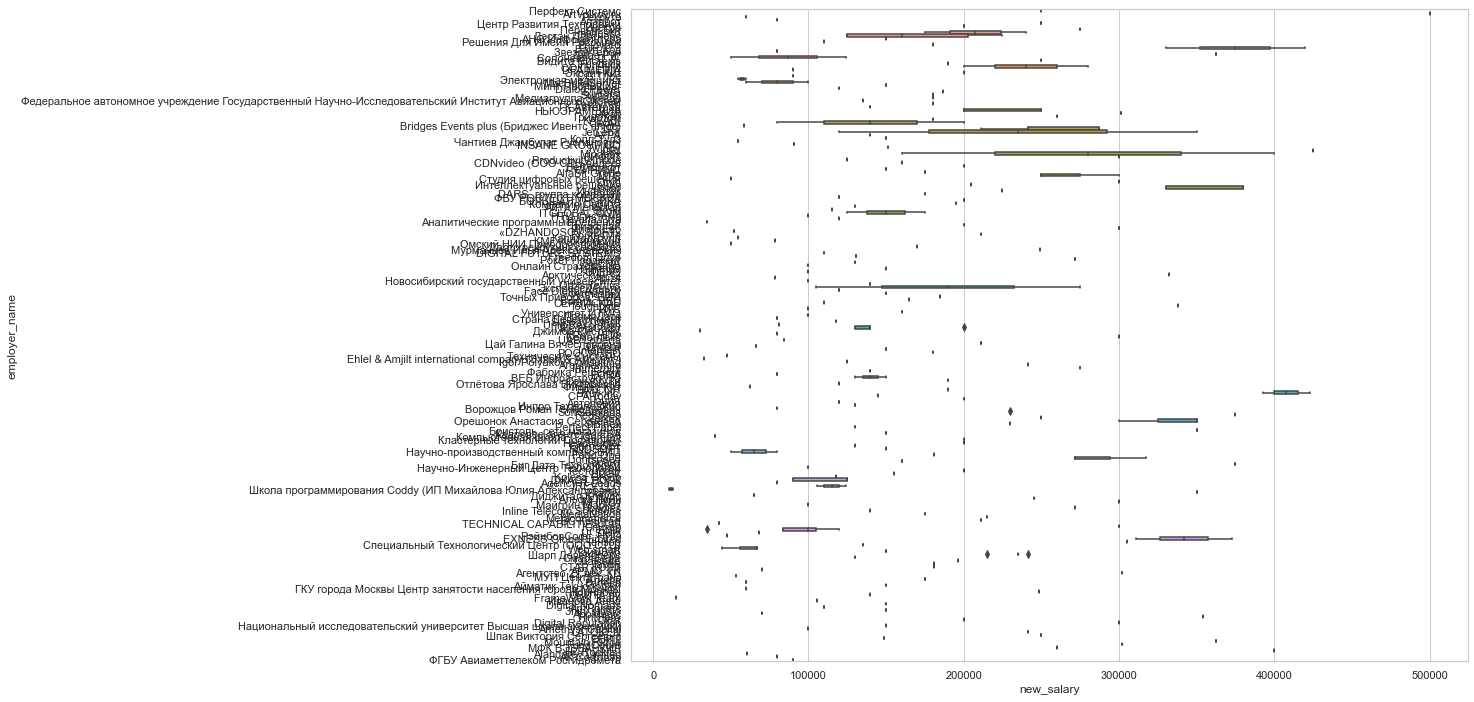

In [183]:
##### 
#####
##### подумать как нормально отобразить
#####
#####

# df_vacancies[~df_vacancies['new_salary'].isnull()]

sns.boxplot(data=df_vacancies[~df_vacancies['new_salary'].isnull()], 
            x='new_salary', 
            y='employer_name')

>## Анализ зарплат по регионам

<AxesSubplot:xlabel='new_salary', ylabel='area'>

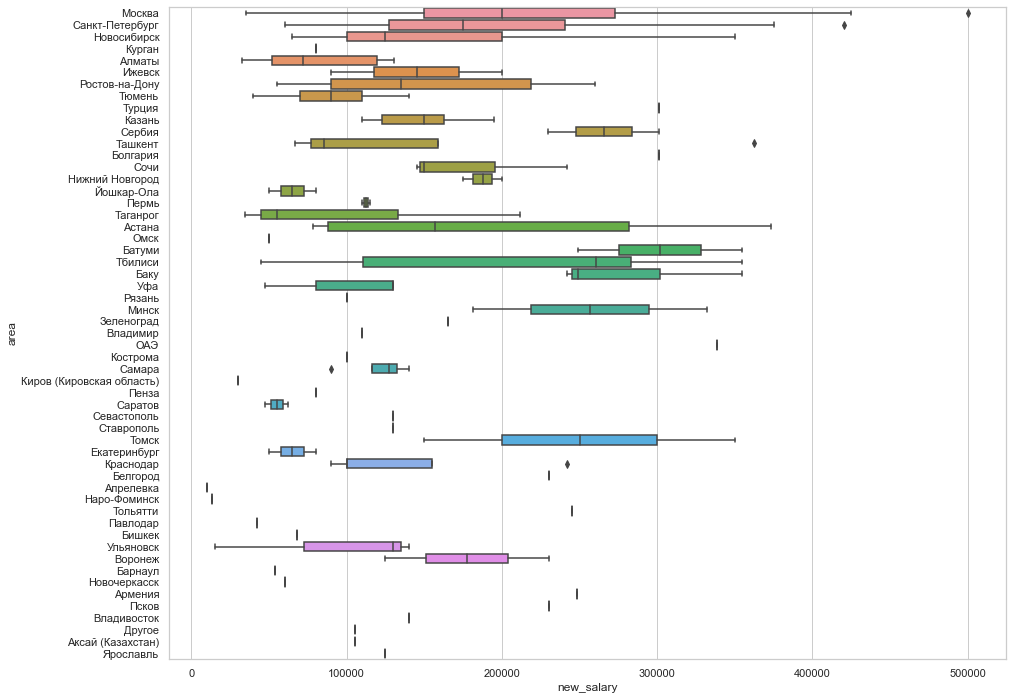

In [165]:
sns.boxplot(data=df_vacancies[~df_vacancies['new_salary'].isnull()], 
            x='new_salary', 
            y='area')

>## Анализ зарплат по режиму работы

<AxesSubplot:xlabel='new_salary', ylabel='schedule'>

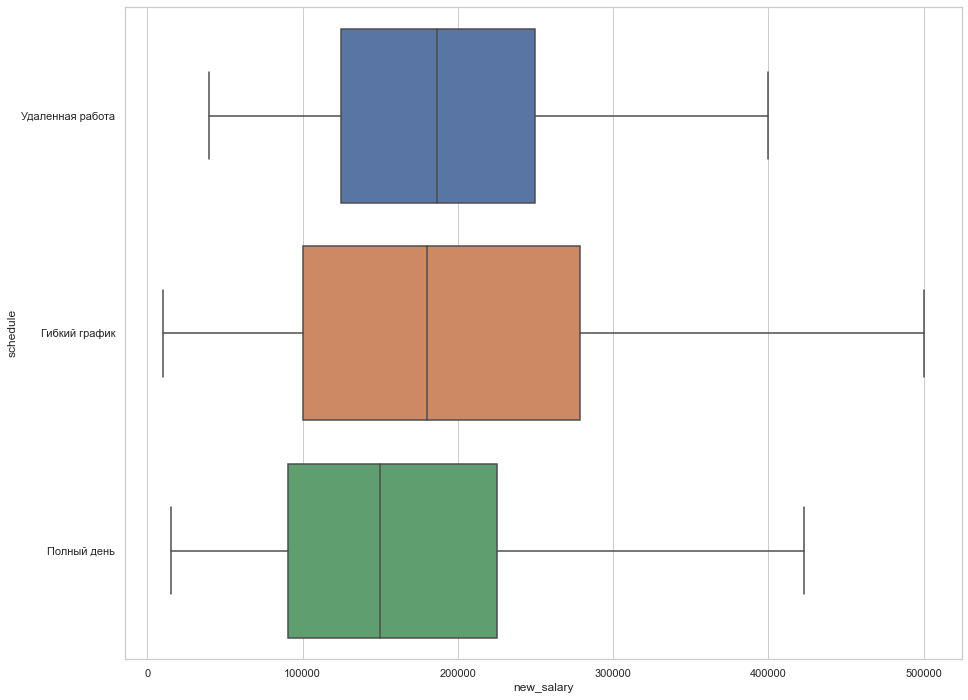

In [167]:
sns.boxplot(data=df_vacancies[~df_vacancies['new_salary'].isnull()], 
            x='new_salary', 
            y='schedule')

>## Wordcloud

### Работодатели

In [218]:
employer_name_text = ",".join(str(x) for x in list(df_vacancies.employer_name.values))

(-0.5, 2999.5, 1999.5, -0.5)

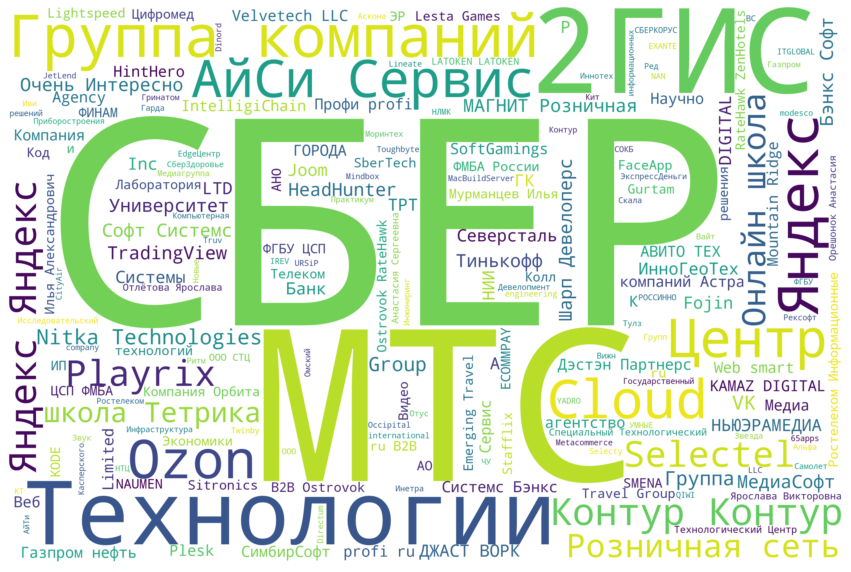

In [219]:
wordcloud = WordCloud(width= 3000, 
                      height = 2000, 
                      random_state=1, 
                      background_color='white').generate(employer_name_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Навыки

(-0.5, 2999.5, 1999.5, -0.5)

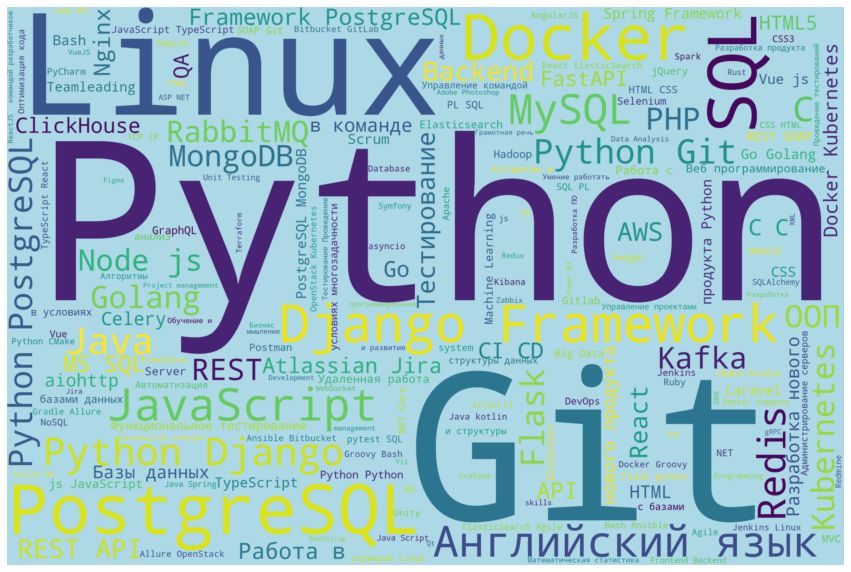

In [232]:
skills_list = list(chain(*df_vacancies.key_skills.values))
skills_text = ','.join(skills_list)
wordcloud = WordCloud(width= 3000, 
                      height = 2000, 
                      random_state=1, 
                      background_color='lightblue').generate(skills_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")